<a href="https://colab.research.google.com/github/AG-2478/LocalRepo/blob/feature1/AirlineModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import LeakyReLU
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from statsmodels.api import OLS
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Airline_editedfull.csv')
df.shape

(648743, 73)

In [ ]:
df.columns

In [ ]:

df = df.sample(frac=0.20, random_state=12)
df.shape


(129749, 73)

##1.Checking if a flight gets delayed or not - Features by Intuition

In [ ]:
#limited variables
def lim_var_delaycheck(df):
  X = df[['NAirTime','NCityTrafficFreq', 'NStateAirportCount','NGroundTime', 'NFlightUsage']].values
  Y = df[['DelayCheck']]
  X1 =
  return X,Y


In [ ]:
#train and test
from sklearn.model_selection import train_test_split

def train_and_test(X,Y):
#'NGroundTime' is depndent on certain local conditions. It cannot be predicted before the flight.
#X = X.values.reshape(-1,1)
#Y = Y.values.reshape(-1,1)
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 12)
  #x_train, x_vld, y_train, y_vld = train_test_split(x,y,test_size = 0.25,random_state = 12)
  return x_train, x_test, y_train, y_test

x,y = lim_var_delaycheck(df)
x_train, x_test, y_train, y_test = train_and_test(x,y)

###1.a Decision Tree classifier

In [ ]:
# Training the Decision Tree classification model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

#validation metrics
y_pred = dt.predict(x_test)
#testing = np.array(y_test).argmax(axis=1)
#predictions = np.array(y_pred).argmax(axis=1)
#confusion_matrix(testing, predictions)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix\n",cm)
print("\nAccuracy score\n", accuracy_score(y_test, y_pred))
print("\nReport\n",classification_report(y_test, y_pred))


In [ ]:
'''
#Decision tree image
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
'''

###1.b Random Forest Classifier

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 12)
classifier.fit(x_train, y_train)

# Predicting a new result
#print(classifier.predict(sc.transform([[30,87000]])))

# Predicting the Test set results
y_pred = classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix\n",cm)
print("\nAccuracy score\n", accuracy_score(y_test, y_pred))
print("\nReport\n",classification_report(y_test, y_pred))

###1.c Naive Bayes

In [ ]:

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix\n",cm)
print("\nAccuracy score\n", accuracy_score(y_test, y_pred))
print("\nReport\n",classification_report(y_test, y_pred))

###1.d. KNN classifier

In [ ]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix\n",cm)
print("\nAccuracy score\n", accuracy_score(y_test, y_pred))
print("\nReport\n",classification_report(y_test, y_pred))

###1.e.Neural Networks

In [ ]:
model = keras.Sequential(
    [
     keras.Input(shape=(5)),
     layers.Dense(256,activation='relu', use_bias=True),
     layers.Dense(512, activation='sigmoid'),
     layers.Dense(1),
    ]
)

print(model.summary()) #gives info about the network

#from_logits - it uses softmax function and then uses crossentropy
#If there is no 'sparse' in cross entropy, then it is for one-hot encodings

model.add(LeakyReLU(alpha=0.1))
keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

#Verbose - means prints after each epoch
#accuracy on training and test sets are displayed
history = model.fit(x_train, y_train, batch_size=64, validation_split= 0.25, epochs=20, verbose=2)
#history2 = model.fit(x_test, y_test, batch_size=32,epochs=20, verbose=2)

model.evaluate(x_test, y_test, batch_size=32,verbose=2)
#history = model.fit(X_train_scalled, y_train, validation_split=0.2, epochs=100)


In [ ]:
import seaborn as sns
sns.set(style = 'whitegrid')
plt.figure(figsize=((14,8)))

plt.subplot(1,2,1)
loss = history.history['loss']
val_loss = history.history['val_loss']
#test_loss = history2.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r.-', label='Validation loss')
#plt.plot(epochs, test_loss, 'g.-', label='Test loss')
plt.title('Training, Validation and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc, 'y', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validaton Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


##2.Feature Importance

#####Selecting only numerical columns for feature importance

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf = newdf.drop(['Unnamed: 0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'Y1', 'Y2',
       'Y3', 'Y4', 'Unnamed: 0.1'], axis=1)
print(newdf.shape)
X = newdf.loc[:, newdf.columns !='DelayCheck']
X = X.loc[:, X.columns !='NTotalDelay']

Y = newdf.iloc[:,-8:-7].values
X.shape

(129749, 44)


(129749, 42)

In [ ]:
X.head(5)

In [ ]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

###2.a.Logistic regression for feature importance

In [ ]:
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, Y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

###2.b.Decision Tree for feature

Feature: 0, Score: 0.00002
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00002
Feature: 4, Score: 0.00003
Feature: 5, Score: 0.00003
Feature: 6, Score: 0.00005
Feature: 7, Score: 0.00003
Feature: 8, Score: 0.00007
Feature: 9, Score: 0.00004
Feature: 10, Score: 0.00005
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.00013
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00009
Feature: 17, Score: 0.00003
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00003
Feature: 20, Score: 0.00004
Feature: 21, Score: 0.00007
Feature: 22, Score: 0.00009
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00007
Feature: 28, Score: 0.00007
Feature: 29, Score: 0.00006
Feature: 30, Score: 0.00003
Feature: 31, Score: 0.00006
Feature: 32, Score: 0.00003
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

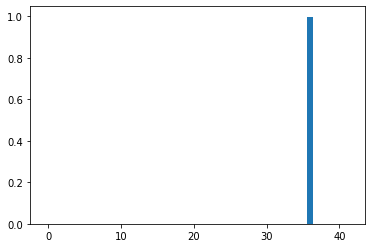

In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, Y)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Decision Tree using RFE(Recursive Feature Elimination)

In [ ]:
model = DecisionTreeClassifier()
# fit the model
model.fit(X, Y)
rfe = RFE(model, 5)
rfe = rfe.fit(X, Y)
# get importance
print(rfe.support_)
print(rfe.ranking_)
'''
ranking = rfe.ranking_.reshape(X[0].shape)
# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()
'''

NameError: ignored

###2.c. RandomForest Feature Importance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature: 0, Score: 0.01582
Feature: 1, Score: 0.00621
Feature: 2, Score: 0.01036
Feature: 3, Score: 0.01320
Feature: 4, Score: 0.00899
Feature: 5, Score: 0.01564
Feature: 6, Score: 0.01249
Feature: 7, Score: 0.01182
Feature: 8, Score: 0.01060
Feature: 9, Score: 0.01288
Feature: 10, Score: 0.01274
Feature: 11, Score: 0.01151
Feature: 12, Score: 0.01494
Feature: 13, Score: 0.01496
Feature: 14, Score: 0.05520
Feature: 15, Score: 0.03334
Feature: 16, Score: 0.01295
Feature: 17, Score: 0.01498
Feature: 18, Score: 0.01380
Feature: 19, Score: 0.01099
Feature: 20, Score: 0.01370
Feature: 21, Score: 0.01309
Feature: 22, Score: 0.05781
Feature: 23, Score: 0.05084
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.01219
Feature: 28, Score: 0.01288
Feature: 29, Score: 0.01259
Feature: 30, Score: 0.01259
Feature: 31, Score: 0.00599
Feature: 32, Score: 0.04066
Feature: 33, Score: 0.00614
Feature: 34, Score: 0.02448
Feature: 35, Score: 0.00028
Fe

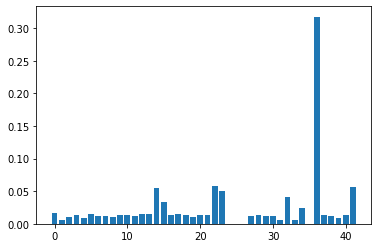

In [ ]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, Y)
'''
rfe = RFE(model, 5)
rfe = rfe.fit(X, Y)
print(rfe.support_)
print(rfe.ranking_)
'''
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
rfe = RFE(model, 5)
rfe = rfe.fit(X, Y)
# get importance
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False False False False False
 False  True  True False False False False False False False  True False
 False False False False False False False False False False False False
  True False False False False  True]
[22 32 27 20 31  3 13 24 29 11 19 26  7  1  1 10 21 17  8 28 15 23  1  5
 37 38 36 25  9 16  4 33  2 34  6 35  1 12 18 30 14  1]


###1.Modelling based on Feature Importance

In [ ]:
#Displaying all the features with name and number
c = df.columns
n=0
for i in c:
  print('Feature', n, i)
  n=n+1

In [ ]:
from sklearn.model_selection import train_test_split
def lim_var_delaycheck(df, s1, s2, s3, s4, s5):
  X = df[[s1, s2, s3, s4, s5]].values
  Y = df[['DelayCheck']]
  #train and test
#'NGroundTime' is depndent on certain local conditions. It cannot be predicted before the flight.
#X = X.values.reshape(-1,1)
#Y = Y.values.reshape(-1,1)
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 12)
  #x_train, x_vld, y_train, y_vld = train_test_split(x,y,test_size = 0.25,random_state = 12)
  return x_train, x_test, y_train, y_test


In [ ]:
x_train, x_test, y_train, y_test = lim_var_delaycheck(df, 'DepDelay' , 'ArrivalDelayGroups', 'CarrierDelay', 'LateAircraftDelay', 'TotalDelayBucket')
x_train.shape

(486557, 5)

In [ ]:
corr = df.corr()
corr

,Unnamed: 0,W1,W2,W3,W4,W5,W6,W7,Y1,Y2,Y3,Y4,Unnamed: 0.1,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightNumberReportingAirline,OriginAirportID,OriginCityMarketID,OriginWac,DestAirportID,DestCityMarketID,DestWac,CRSDepTime,DepTime,DepDelay,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrivalDelayGroups,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,NAirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NTotalDelay,NGroundTime,DelayCheck,NCityTrafficFreq,NStateAirportCount,NFlightUsage,TotalDelayBucket
Unnamed: 0,1.000000,0.000361,0.001174,0.001417,0.002753,-5.967189e-04,-0.005461,-0.000023,-0.622024,0.118809,0.311338,0.109253,0.225681,0.543921,0.002096,0.002389,-0.001135,-0.002719,0.074332,-0.008678,-0.001621,0.005723,-0.007460,-0.000090,0.004815,-0.006465,-0.004333,0.019772,0.009926,0.008576,-0.003962,-0.005590,0.023930,-0.002554,-0.005893,0.008811,0.008677,NaN,NaN,NaN,0.019496,0.014768,0.011740,0.008924,0.010168,0.031384,0.006062,0.024695,-0.001249,0.042842,0.054856,0.021163,0.074094,0.002528,0.004170,0.029349,6.325135e-02
W1,0.000361,1.000000,-0.171415,-0.172712,-0.173955,-1.738608e-01,-0.156940,-0.168167,-0.000006,-0.002751,0.002294,0.000835,0.000037,0.000631,0.000594,0.000379,-0.003052,-0.001966,0.000558,-0.001122,-0.000045,-0.000717,0.000290,0.001335,0.000230,0.001010,0.001485,0.002918,0.003136,0.001975,0.001728,0.000587,-0.000254,0.000908,0.000236,0.002791,0.002689,NaN,NaN,NaN,-0.001480,-0.001419,-0.001801,-0.001424,-0.001675,0.001121,0.001913,0.000391,0.002483,0.003089,0.003124,0.001945,0.000256,0.000217,0.001166,0.000759,2.900566e-03
W2,0.001174,-0.171415,1.000000,-0.170431,-0.171658,-1.715645e-01,-0.154867,-0.165946,-0.000678,-0.000925,0.002154,-0.000779,0.001172,0.000473,-0.002334,-0.002302,-0.002410,-0.001846,0.000851,-0.000035,0.000415,-0.001225,-0.000609,-0.001859,0.001279,0.000673,0.000831,-0.001503,-0.001227,-0.000558,0.001394,0.000795,-0.000052,0.000466,0.000650,-0.001672,-0.001285,NaN,NaN,NaN,-0.001697,-0.001847,-0.001788,-0.001948,-0.002036,-0.001474,0.001385,0.000946,-0.000770,-0.001288,-0.000866,-0.000754,-0.000744,-0.001090,-0.002830,0.000774,-8.347946e-04
W3,0.001417,-0.172712,-0.170431,1.000000,-0.172957,-1.728628e-01,-0.156039,-0.167201,-0.002918,0.003021,-0.001147,0.000490,-0.000098,0.002113,-0.000948,-0.000411,0.003092,0.001375,-0.001719,0.002625,0.000314,0.001300,0.001836,0.001033,0.000865,-0.000441,-0.000875,-0.000409,-0.001353,-0.001046,-0.000668,0.000442,-0.001887,0.000690,0.000373,-0.000846,-0.001781,NaN,NaN,NaN,0.002343,0.002103,0.002452,0.002788,0.002836,0.000812,0.001138,-0.002813,-0.002132,-0.000611,-0.000894,-0.001601,-0.001787,0.001787,0.000535,-0.000580,-1.819048e-03
W4,0.002753,-0.173955,-0.171658,-0.172957,1.000000,-1.741073e-01,-0.157162,-0.168405,-0.003930,-0.000837,0.003019,0.001522,-0.002048,0.004395,0.002219,0.002016,0.001212,0.002343,-0.000998,-0.001790,-0.000733,0.002062,-0.000264,0.000008,-0.001255,0.001081,0.000926,0.001170,0.000975,-0.002294,0.000479,0.000064,-0.000766,-0.000055,0.000264,0.000564,0.000392,NaN,NaN,NaN,0.001921,0.001663,0.002084,0.002213,0.002306,0.001211,0.000213,0.001146,-0.000476,0.000972,0.001790,-0.002122,0.003042,0.000404,0.000715,-0.001581,1.811611e-03
W5,-0.000597,-0.173861,-0.171564,-0.172863,-0.174107,1.000000e+00,-0.157077,-0.168314,0.001416,-0.001506,0.001330,-0.001187,0.000555,-0.001890,-0.000486,-0.000648,-0.001625,0.000823,0.002331,0.000391,0.001308,-0.000985,0.000337,0.001077,0.000077,0.000254,0.000307,0.000144,0.000430,0.000860,0.000796,-0.000280,-0.000176,-0.000111,-0.000274,0.000285,0.000745,NaN,NaN,NaN,-0.000995,-0.000917,-0.001119,-0.001610,-0.001669,-0.000296,-0.001961,0.001459,-0.000298,-0.000818,-0.000488,0.000994,0.000396,-0.000754,-0.000985,-0.000414,-3.551824e-07
W6,-0.005461,-0.156940,-0.154867,-0.156039,-0.157162,-1.570769e-01,1.000000,-0.151932,0.006129,0.002775,-0.005690,-0.003133,-0.000559,-0.006387,-0.000055,-0.000042,0.000999,-

###a.KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix\n",cm)
print("\nAccuracy score\n", accuracy_score(y_test, y_pred))
print("\nReport\n",classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.



Confusion matrix
 [[132887    146]
 [    44  29109]]

Accuracy score
 0.9988285055430185

Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    133033
           1       1.00      1.00      1.00     29153

    accuracy                           1.00    162186
   macro avg       1.00      1.00      1.00    162186
weighted avg       1.00      1.00      1.00    162186



###b. DTree

In [ ]:
# Training the Decision Tree classification model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

#validation metrics
y_pred = dt.predict(x_test)
#testing = np.array(y_test).argmax(axis=1)
#predictions = np.array(y_pred).argmax(axis=1)
#confusion_matrix(testing, predictions)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix\n",cm)
print("\nAccuracy score\n", accuracy_score(y_test, y_pred))
print("\nReport\n",classification_report(y_test, y_pred))


Confusion matrix
 [[133033      0]
 [     0  29153]]

Accuracy score
 1.0

Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    133033
           1       1.00      1.00      1.00     29153

    accuracy                           1.00    162186
   macro avg       1.00      1.00      1.00    162186
weighted avg       1.00      1.00      1.00    162186



###3.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 12)
classifier.fit(x_train, y_train)

# Predicting a new result
#print(classifier.predict(sc.transform([[30,87000]])))

# Predicting the Test set results
y_pred = classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix\n",cm)
print("\nAccuracy score\n", accuracy_score(y_test, y_pred))
print("\nReport\n",classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until



Confusion matrix
 [[133033      0]
 [     0  29153]]

Accuracy score
 1.0

Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    133033
           1       1.00      1.00      1.00     29153

    accuracy                           1.00    162186
   macro avg       1.00      1.00      1.00    162186
weighted avg       1.00      1.00      1.00    162186



###4. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix\n",cm)
print("\nAccuracy score\n", accuracy_score(y_test, y_pred))
print("\nReport\n",classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Confusion matrix
 [[131070   1963]
 [     0  29153]]

Accuracy score
 0.9878966125312912

Report
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    133033
           1       0.94      1.00      0.97     29153

    accuracy                           0.99    162186
   macro avg       0.97      0.99      0.98    162186
weighted avg       0.99      0.99      0.99    162186



###e. Neural Networks

In [ ]:
model = keras.Sequential(
    [
     keras.Input(shape=(5)),
     layers.Dense(256,activation='relu', use_bias=True),
     layers.Dense(512, activation='sigmoid'),
     layers.Dense(1),
    ]
)

print(model.summary()) #gives info about the network

#from_logits - it uses softmax function and then uses crossentropy
#If there is no 'sparse' in cross entropy, then it is for one-hot encodings

model.add(LeakyReLU(alpha=0.1))
keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

#Verbose - means prints after each epoch
#accuracy on training and test sets are displayed
history = model.fit(x_train, y_train, batch_size=64, validation_split= 0.25, epochs=5, verbose=2)
#history2 = model.fit(x_test, y_test, batch_size=32,epochs=20, verbose=2)

model.evaluate(x_test, y_test, batch_size=32,verbose=2)
#history = model.fit(X_train_scalled, y_train, validation_split=0.2, epochs=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1536      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 133,633
Trainable params: 133,633
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
5702/5702 - 20s - loss: 0.0033 - accuracy: 0.9980 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 2/5
5702/5702 - 17s - loss: 3.1693e-04 - accuracy: 1.0000 - val_loss: 1.6377e-05 - val_accuracy: 1.0000
Epoch 3/5
5702/5702 - 17s - loss: 1.9637e-04 - accuracy: 1.0000 - val_loss: 8.1212e-06 - val_accuracy: 1.0000
Epoch 4/5
5702/5702 - 17s - loss: 1.2288e-04 - accura

[1.3526791917684022e-05, 1.0]

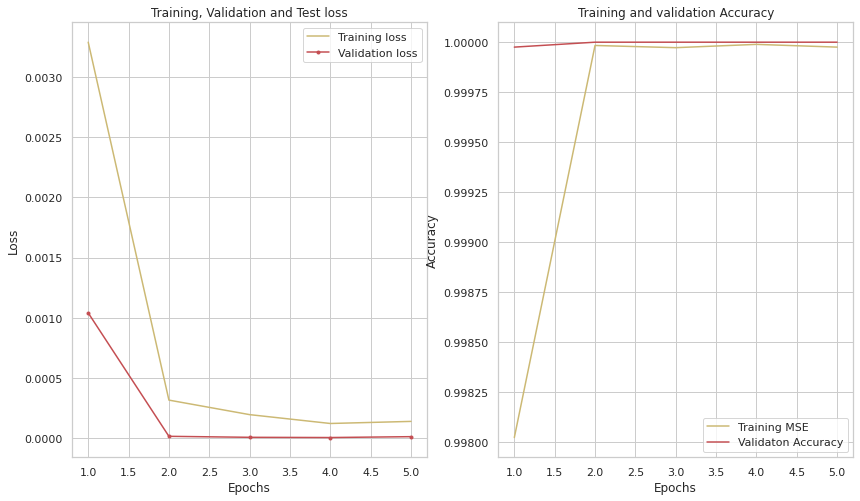

In [ ]:
import seaborn as sns
sns.set(style = 'whitegrid')
plt.figure(figsize=((14,8)))

plt.subplot(1,2,1)
loss = history.history['loss']
val_loss = history.history['val_loss']
#test_loss = history2.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r.-', label='Validation loss')
#plt.plot(epochs, test_loss, 'g.-', label='Test loss')
plt.title('Training, Validation and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc, 'y', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validaton Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


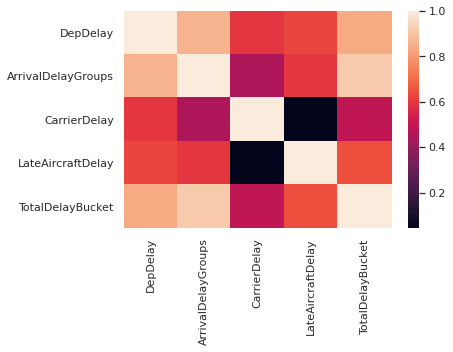

In [ ]:
import seaborn as sns
dfn = df[['DepDelay' , 'ArrivalDelayGroups', 'CarrierDelay', 'LateAircraftDelay', 'TotalDelayBucket']]
sns.heatmap(dfn.corr())

###2.d.Permutation Feature Importance

In [ ]:
'''
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, Y)
# perform permutation importance
results = permutation_importance(model, X, Y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
'''

###2.e.Recursive Feature Elimination